-------------------k-Nearest Neighbour Algorithm-----------------
Name: Farhana Khatoon Abdul Rashid
Roll No.21
College name: Vivek College of Commerce
M.sc(I.T)[Sem 3]
Date and Time = 28/11/2022 09:41:45

Dataset:-
    sepal-length  sepal-width  petal-length  petal-width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Prediction on Test set:-
 ['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa']

-------------------------------------------------------------------------
Original Lab

<Figure size 640x480 with 0 Axes>

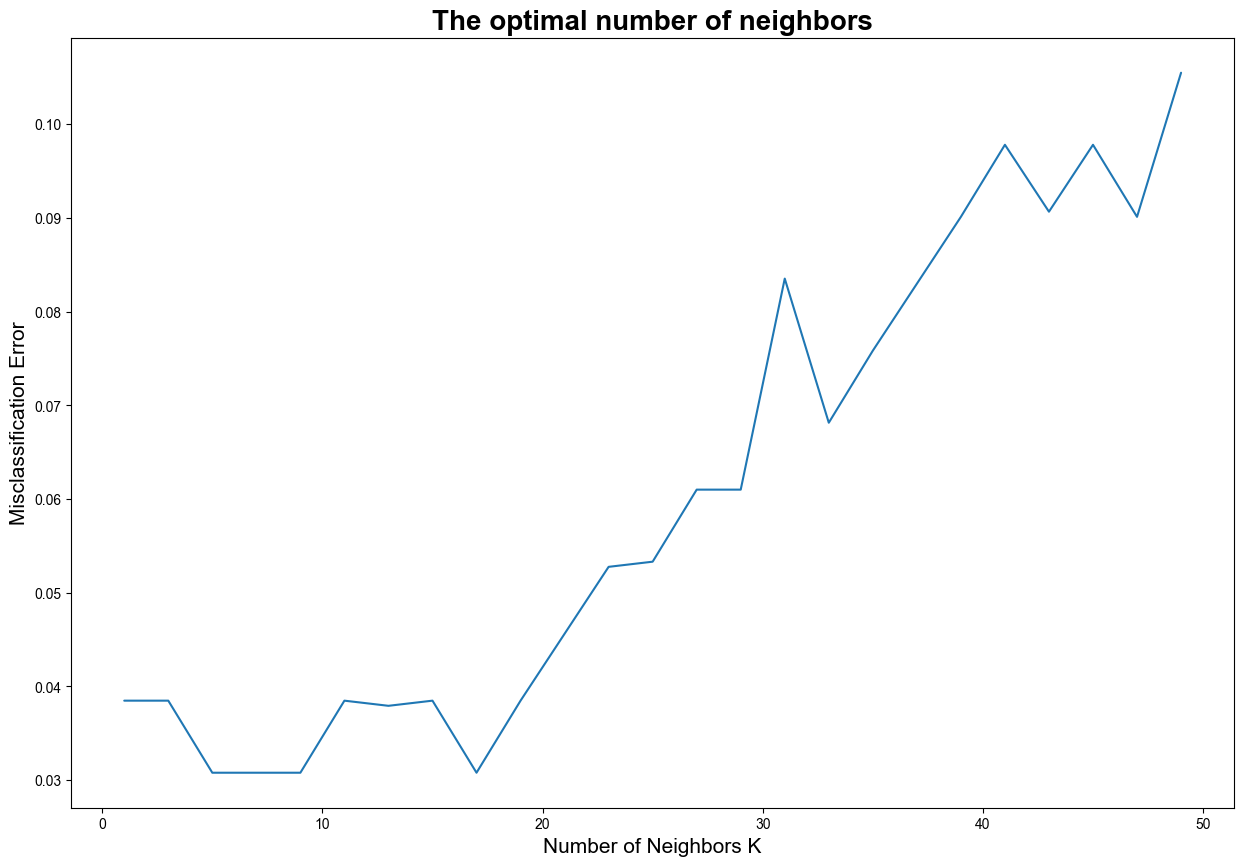

In [1]:
from datetime import datetime
print('-------------------k-Nearest Neighbour Algorithm-----------------')
print('Name: Farhana Khatoon Abdul Rashid')
print('Roll No.21')
print('College name: Vivek College of Commerce')
print('M.sc(I.T)[Sem 3]')
now = datetime.now()
# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("Date and Time =", dt_string)	
import numpy as np 
import pandas as pd
from sklearn import metrics
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
# Import the data set
# Read dataset to pandas dataframe
dataset = pd.read_csv("8-Irisdataset.csv", names=names)
print("\nDataset:-\n", dataset.head())
#Assigning ‘X’ as independent variable and ‘Y’ as dependent variable
X = dataset.iloc[:, :-1]  
y = dataset.iloc[:, -1]
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.10) 
#Training the K-Nearest Neighbour model on the Training Set
from sklearn.neighbors import KNeighborsClassifier
# Instantiate learning model (k = 5)
classifier = KNeighborsClassifier(n_neighbors=5).fit(Xtrain, ytrain) 
#Predicting the Test set results
ypred = classifier.predict(Xtest)
print("\nPrediction on Test set:-\n", ypred)
i = 0
print ("\n-------------------------------------------------------------------------")
print ('%-25s %-25s %-25s' % ('Original Label', 'Predicted Label', 'Correct/Wrong'))
print ("-------------------------------------------------------------------------")
for label in ytest:
    print ('%-25s %-25s' % (label, ypred[i]), end="")
    if (label == ypred[i]):
        print (' %-25s' % ('Correct'))
    else:
        print (' %-25s' % ('Wrong'))
    i = i + 1
print ("-------------------------------------------------------------------------")
print("\nConfusion Matrix:\n",metrics.confusion_matrix(ytest, ypred))  
print("\nClassification Report:\n",metrics.classification_report(ytest, ypred)) 
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(ytest,ypred))
# finding best k
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []
# perform 10-fold cross validation
from sklearn.model_selection import cross_val_score
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Xtrain, ytrain, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)
#Visualize optimal number of neighbors
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
plt.show()

C:\Users\Mscit6\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 640x480 with 0 Axes>

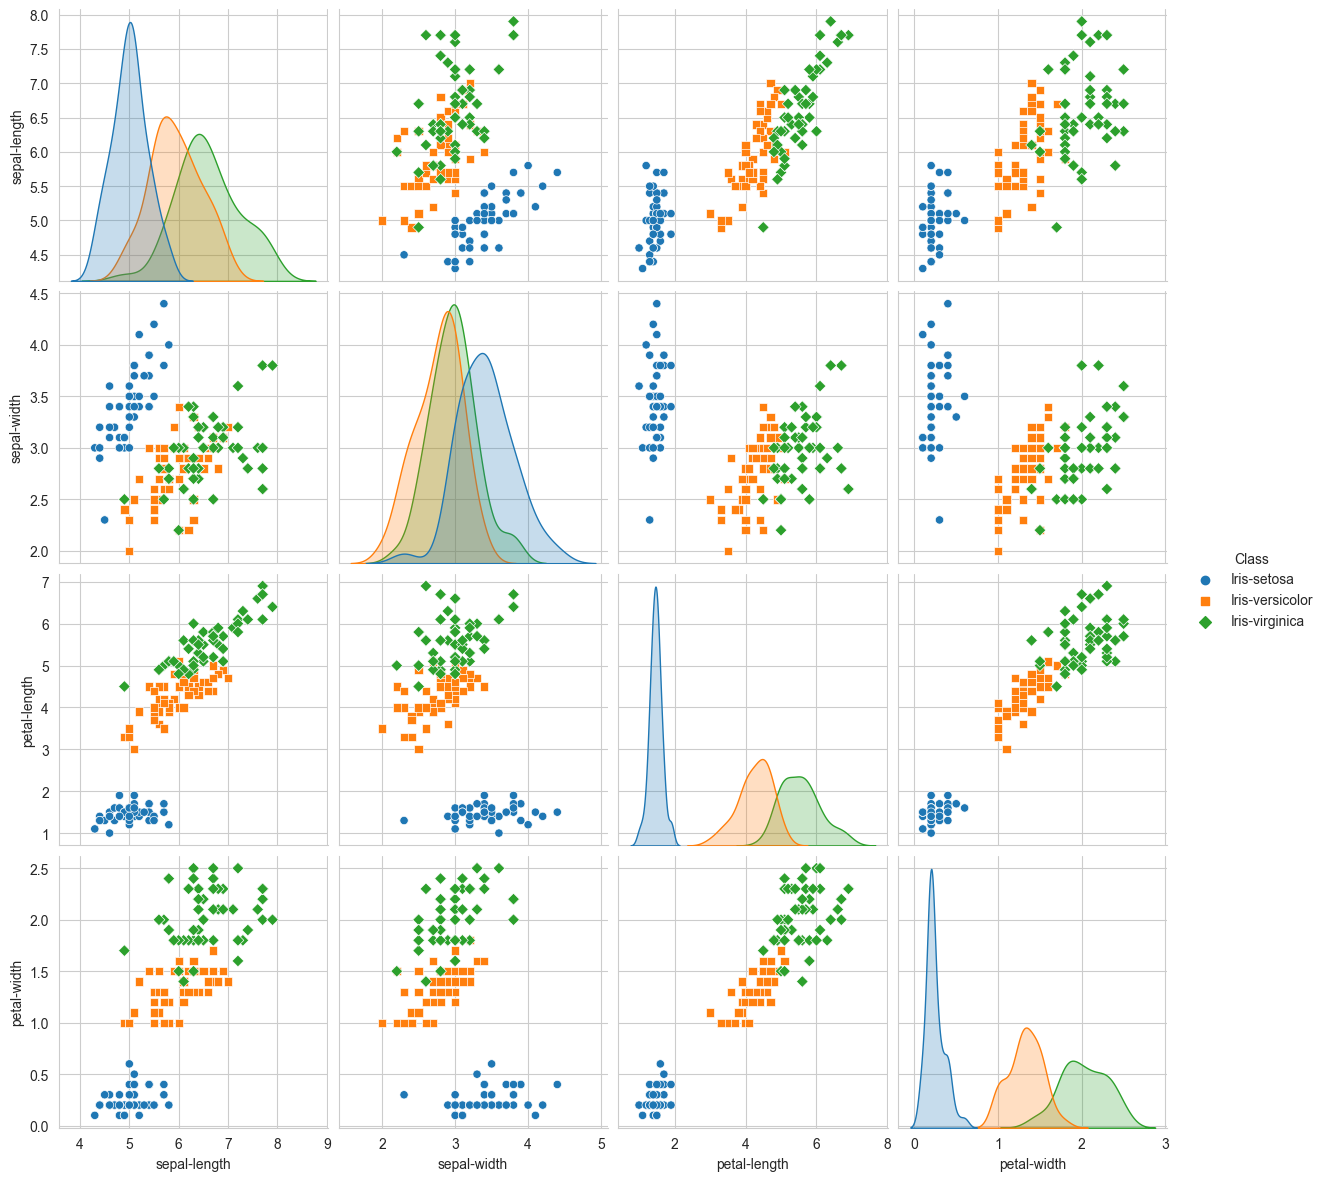

In [2]:
#Pairplot
plt.figure()
sns.pairplot(dataset,hue = "Class", size=3, markers=["o", "s", "D"])
plt.show()